<a href="https://colab.research.google.com/github/RenatevanKempen/Python-in-Power-BI/blob/main/Power_BI_code_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

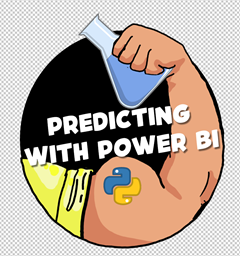

In [ ]:
# 'dataset' holds the input data for this script

# import the packages we need
import pandas as pd #we use this to load, read and transform the dataset
import numpy as np #we use this for statistical analysis
import matplotlib.pyplot as plt #we use this to visualize the dataset
#import seaborn as sns #we use this to make countplots
import sklearn.metrics as sklm #This is to test the models
from sklearn.model_selection import train_test_split #to split the dataset

#Load the model
from sklearn.linear_model import LinearRegression

data = dataset

#Changing the Risk column to a percentage.
#good = <25% risk, bad = >75% risk
data['percentage'] = data['Risk'].apply(lambda x: np.random.randint(0,25) if x == 'good' else np.random.randint(75,100))
data['percentage'] = data['percentage'].astype(int)

#Handling the missing values
data['Checking account'] = data['Checking account'].fillna('no_inf')
data['Saving accounts'] = data['Saving accounts'].fillna('no_inf')


#Make all columns numeric

def f(df):
    if df[col] == "little":
        val = 7
    elif df[col] == "moderate":
        val = 5
    elif df[col] == "rich":
        val = 1
    elif df[col] == "quite rich":
        val = 3
    else:
        val = 9
    return val

col = 'Checking account'
data['Checking account'] = data.apply(f, axis = 1)

col = 'Saving accounts'
data['Saving accounts'] = data.apply(f, axis = 1)

def g(df): 
    col = 'Purpose'
    if df[col] == "radio/TV":
        val = 5
    elif df[col] == "education":
        val = 6
    elif df[col] == "furniture/equipement":
        val = 7
    elif df[col] == "car":
        val = 8
    elif df[col] == "business":
        val = 2
    elif df[col] == "domestic appliances":
        val = 4
    elif df[col] == "repairs":
        val = 3
    else:
        val = 1
    return val

data['Purpose'] = data.apply(g, axis = 1)

#drop the original 'Risk' column
data = data.drop(labels = ['Risk'], axis = 1)

#Set up the Machine Learning Model.
#Use 4 most important features
X_6 = data[['Duration', 'Credit amount', 'Age', 'Checking account', 'Saving accounts', 'Purpose']] #independent columns chosen 
y = data['percentage']    #target column 

#Split the traindata, I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_6,y, test_size=0.3, random_state = 25)

# Linear regression model
model_6 = LinearRegression() 
model_6.fit(X_train, y_train)
pred_D = model_6.predict(X_6)

data['Predictions'] = pred_D

#Making the coefficients 
coef = model_6.coef_
components = pd.DataFrame(zip(X_6.columns, coef), columns= ['component', 'value'])
components = components.append({'component':'intercept', 'value': model_6.intercept_}, ignore_index = True)

